### Problem Statement
X Education offers online courses for purchase by business professionals.On several websites and search engines like Google, the firm advertises its courses. Upon arriving at the website, these visitors may explore the courses, submit a form for the course, or watch some videos.These persons are categorized as leads when they fill out a form with their phone number or email address. Additionally, the business receives leads from earlier recommendations.

Once these leads are obtained, sales team members begin calling, sending emails, etc. Some leads are converted during this procedure, but most are not.At X Education, the normal lead conversion rate is roughly 30%.

### Business Objective:

X Education requires assistance in choosing the leads that have the best chance of becoming paying clients.

The business requires a model in which each lead must be given a Lead Score, resulting in a better conversion probability for leads with a higher Lead Score and a lower conversion chance for leads with a lower Lead Score.

The desired lead conversion rate has been estimated by the CEO to be in the range of 80%.

Methodology :
Dataset Reading & Cleaning as per requirement
EDA Analysis
Logistic Regression Model Build up
Model Performance Checking By Accuracy, Sensitivity, Specificity, FPR ect.
Lead Score Assignment to each Leads & Conversion Rate checking
Model Evaluation & Compare

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys, os, traceback
import pyodbc as pyodbc
#import ConfigParser
import pandas as pd
import numpy as np
#from ggplot import *
#%autosave 0
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from pandas.tseries.offsets import MonthEnd
from IPython.display import Image
from IPython.core.display import HTML 

In [4]:
lead_data= pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking Null Percentage
round(100*(lead_data.isna().sum()/len(lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Check for Duplicate records

In [6]:
# Check for duplicate data
dups = lead_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
lead_data[dups]


Number of duplicate rows = 0


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [7]:
# Converting all "Select" to NAN value
lead_data = lead_data.replace('Select', np.nan)

In [8]:
# After conversion checking Null Percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Inference
We will now remove several columns with null percentages greater than 40%, along with the column **Tags**. because the Sales Team essentially designed this section after speaking with clients. But the main goal of our case study is to pinpoint the Leads who are more likely to convert and approach them first. Because of this, we have opted to exclude this column from our analysis because it would otherwise skew it.

In [9]:
# Dropping some columns
del_col = ['How did you hear about X Education','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index',
          'Asymmetrique Activity Score','Asymmetrique Profile Score']
lead_data = lead_data.drop(columns=del_col, axis=1)

In [10]:
lead_data.shape

(9240, 29)

In [11]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
lead_data.City.value_counts(dropna = False, normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

##### One city and Null values make up more than 70% of the data. This variable is obviously useless for our investigation.

In [13]:
# dropping City column 
lead_data = lead_data.drop('City',axis=1)

In [14]:
lead_data.Specialization.value_counts(dropna=False, normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [15]:
# Replacing Null value with Other-Specialization

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others-Specialization')

In [16]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

#### More than 29% of the data have null values and 70% of the data belong for one reason. Thus, analysis is useless. Take a pass on that.


In [17]:
lead_data = lead_data.drop('What matters most to you in choosing a course',1)

In [18]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# Replacing Null Value with No_Information
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan, 'No_Information')

In [20]:
# Replacing Null Value with India
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')

In [21]:
# Once again checking Null Percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [22]:
lead_data.dropna(inplace=True)

In [23]:
# Final Checking for Null Percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [24]:
# checking Conversion Percentage for Converted Column

sum(lead_data['Converted']/len(lead_data['Converted'].index)*100)

37.85541106457961

In [25]:
# Data Retained after cleaning

print(len(lead_data.index)/9240)

0.982034632034632


## EDA Analysis

#### Lead Origin

### Target Variable Analysis

In [26]:
lead_data['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [20]:
lead_data['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

#### Conversion rate is currently 38.5%

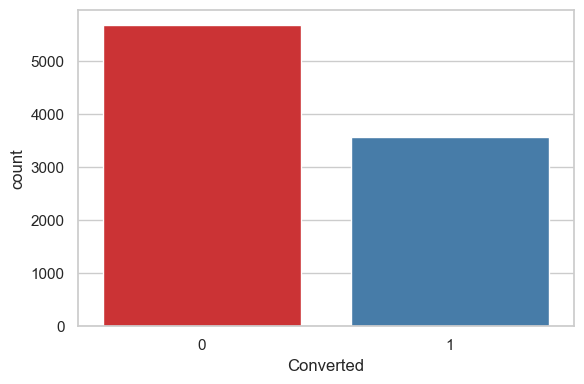

In [19]:
plt.figure(figsize=(6, 4))  # Adjust the size as needed
sns.countplot(x='Converted', data=lead_data, palette='Set1')
plt.tight_layout()
plt.show()

In [29]:
lead_data.groupby('Converted').mean() # Average of term deposit subscribed v/s non-subscribed variable

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,,,,
0,616616.615357,3.331442,330.007803,2.369713
1,617715.544105,3.660553,733.859389,2.370870


#### From this analysis, it seems that the group with "Converted" equal to 1 generally has higher mean values for "TotalVisits" and "Total Time Spent on Website" compared to the group with "Converted" equal to 0. This could indicate that these variables might be associated with higher conversion rates.

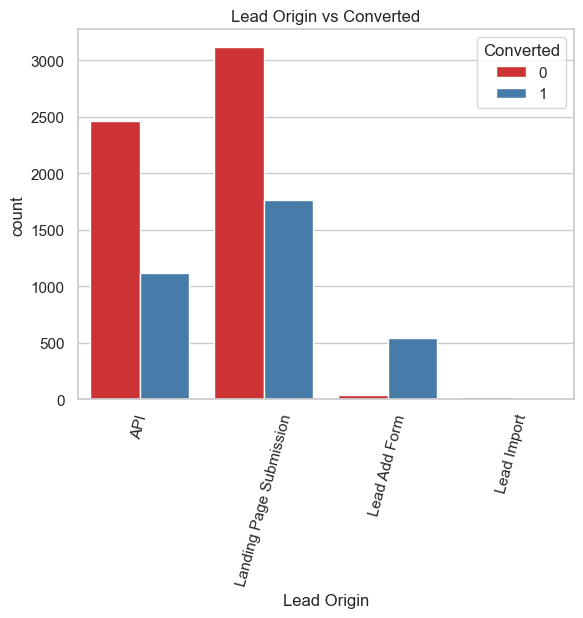

In [30]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

sns.countplot(x='Lead Origin', hue='Converted', data=lead_data, palette="Set1")  # Change the palette here
plt.title('Lead Origin vs Converted')
plt.xticks(rotation=75)
plt.show()

#### Inference
Although the conversion rate via API and Landing Page Submission is just 30–35%, a significant number of leads come from these. Although the Lead Add Form has a conversion rate of above 90%, the number of leads is not particularly large. There are extremely little lead imports. We must increase the number of leads generated by the Lead Add Form and concentrate more on enhancing lead conversion from the API and Landing Page Submission sources in order to raise the total lead conversion rate.

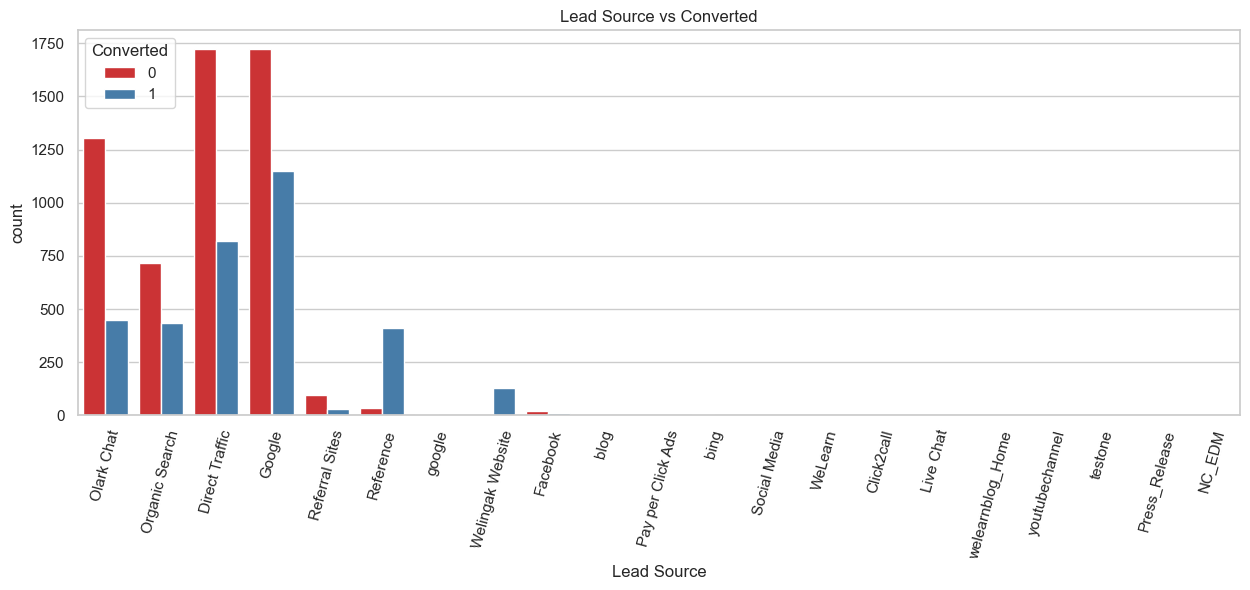

In [31]:
# Plot for Lead Source

plt.figure(figsize=(15,5))
sns.countplot(x='Lead Source', hue='Converted', data= lead_data, palette="Set1")
plt.title('Lead Source vs Converted')
plt.xticks(rotation=75)
plt.show()

In [32]:
# Grouping some features to "Others" which are very low in value for better understanding

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

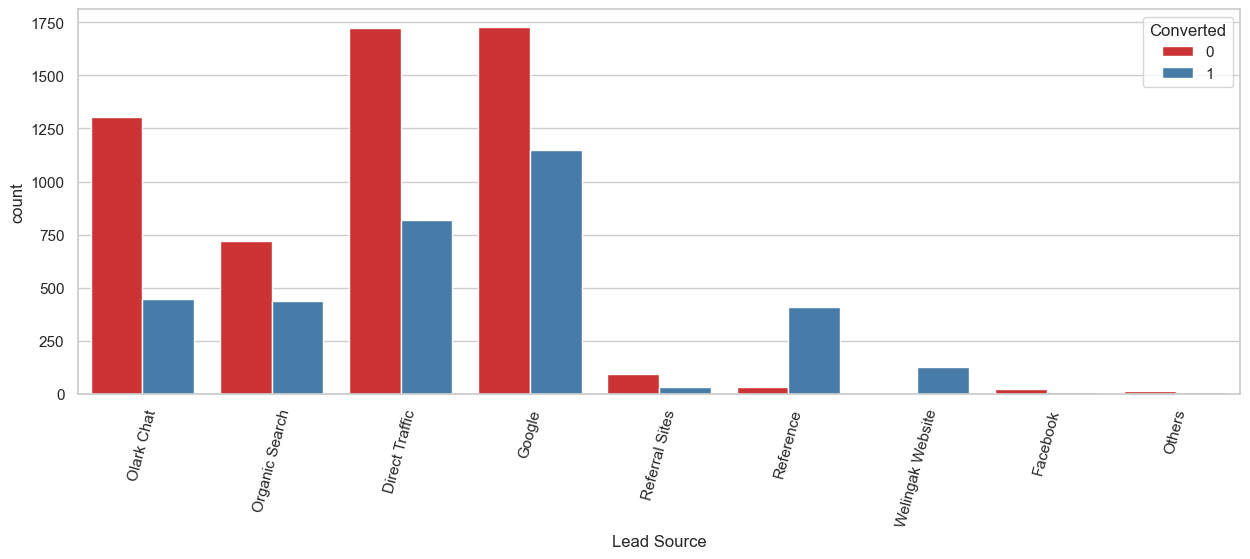

In [33]:
# Plot after grouping

plt.figure(figsize=(15,5))
sns.countplot(x='Lead Source', hue='Converted', data= lead_data, palette="Set1")
plt.xticks(rotation=75)
plt.show()

#### Conclusion
The greatest amount of leads are generated by Google and Direct traffic. Reference leads and leads obtained from the Welingak website have a good conversion rate. Focus should be placed on enhancing lead conversion via olark chat, organic search, direct traffic, and Google leads in order to increase lead conversion overall. More leads should also be generated through the Welingak website and references.


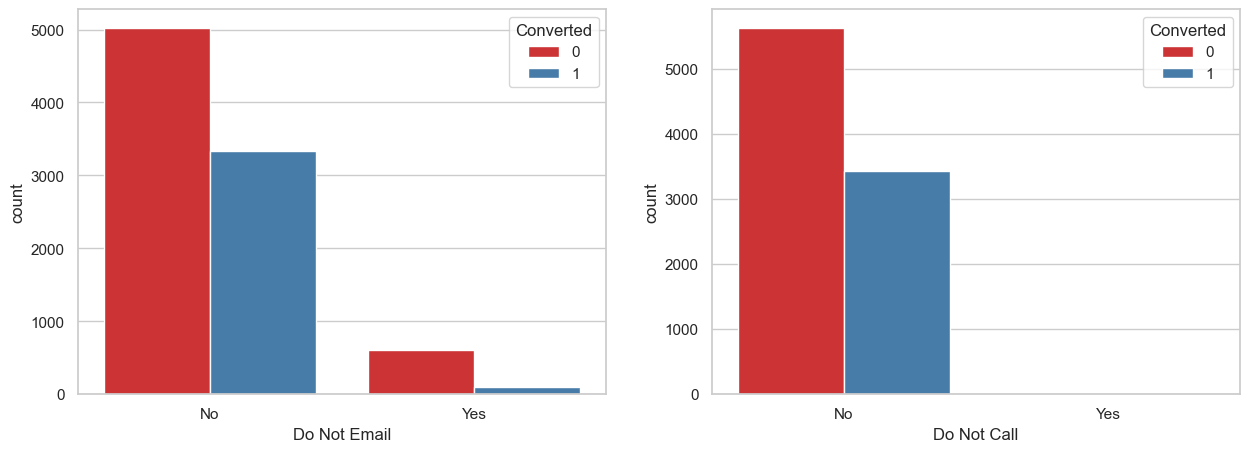

In [34]:
# Plot

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_data, palette="Set1")
plt.xticks(rotation=0)

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_data, palette="Set1")
plt.xticks(rotation=0)
plt.show()

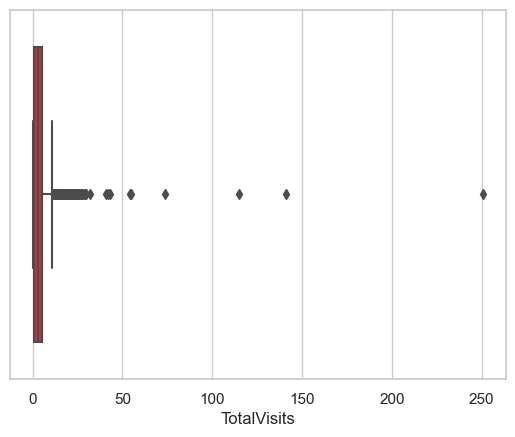

In [35]:
# TotalVisit plot
sns.boxplot(lead_data['TotalVisits'],palette = "Set1")
plt.show()

In [8]:
# CAPPING OUTLIERS AT 5-95 PERCENTILE

qn = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= qn[0]] = qn[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= qn[1]] = qn[1]

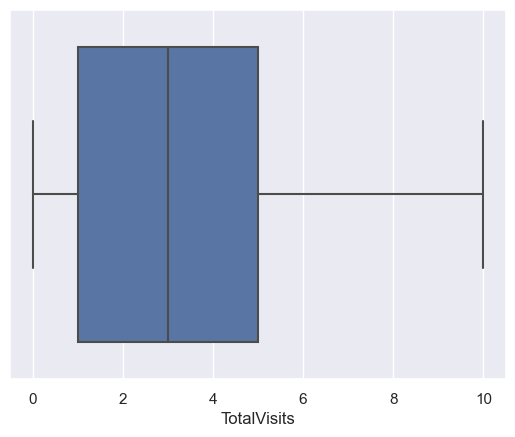

In [9]:
# AFTER CAPPING
sns.boxplot(lead_data['TotalVisits'])
plt.show()

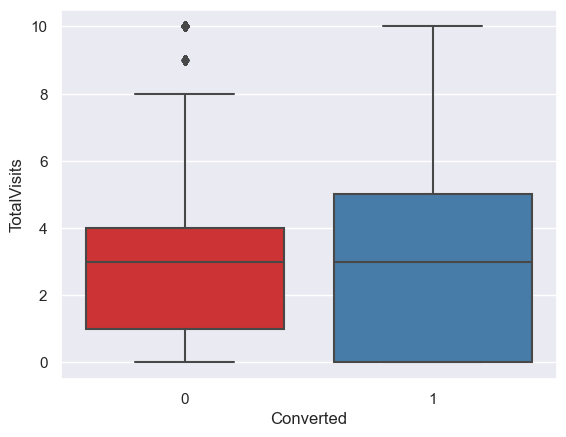

In [10]:
# PLot Converted wise Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data, palette="Set1")
plt.show()

#### Conclusion
The median for leads that were converted and those that were not converted is equal. Nothing definitive can be inferred from Total Visits.

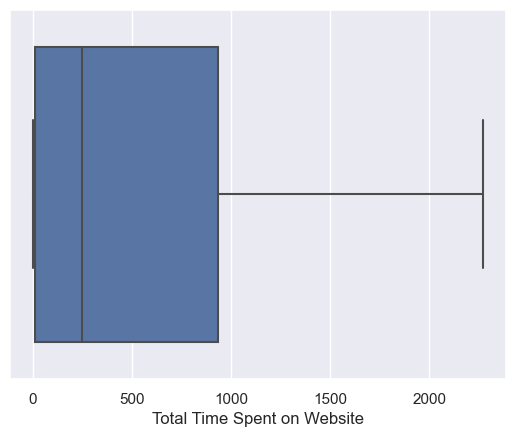

In [11]:
# Plot 
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.show()


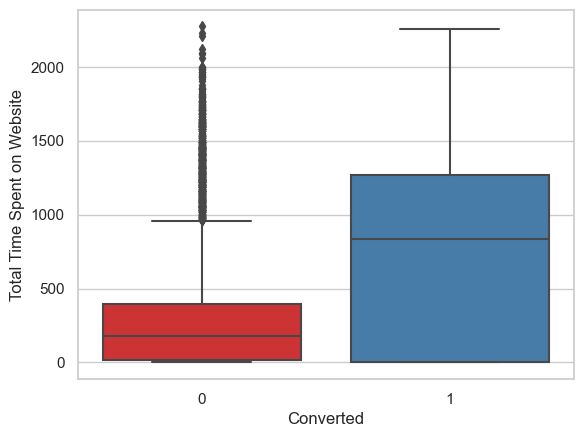

In [21]:
# PLot Converted wise Total Time Spent on Websites
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data, palette="Set1")
plt.show()

#### Conclusion
Leads who spend more time on the website have a higher chance of becoming customers. To get visitors to stay on the website longer, it should be made more interesting.

<AxesSubplot:xlabel='Page Views Per Visit'>

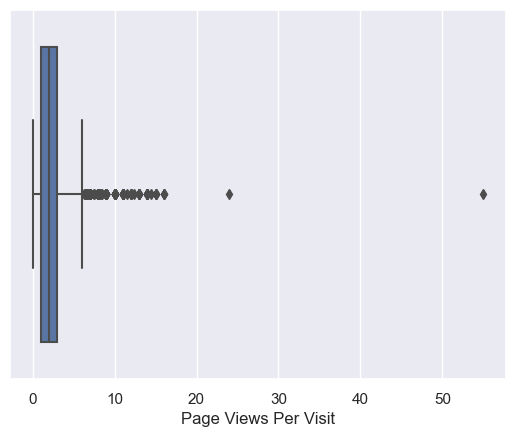

In [13]:
# Plot Page Views
sns.boxplot(lead_data['Page Views Per Visit'])

In [14]:
# Capping outliers

qn = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= qn[0]] = qn[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= qn[1]] = qn[1]

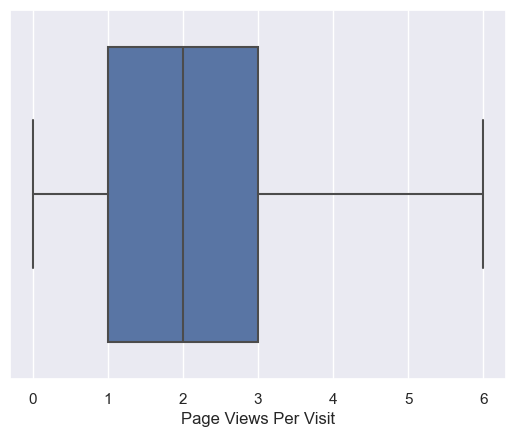

In [15]:
# After Capping

sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

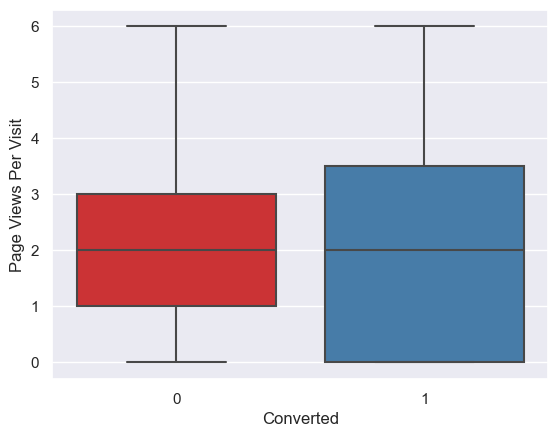

In [16]:
# Compare

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data, palette="Set1")
plt.show()

#### The value of the median for both converted and unconverted leads is the same, inference. Nothing specific about lead conversion from page views per visit can be mentioned.

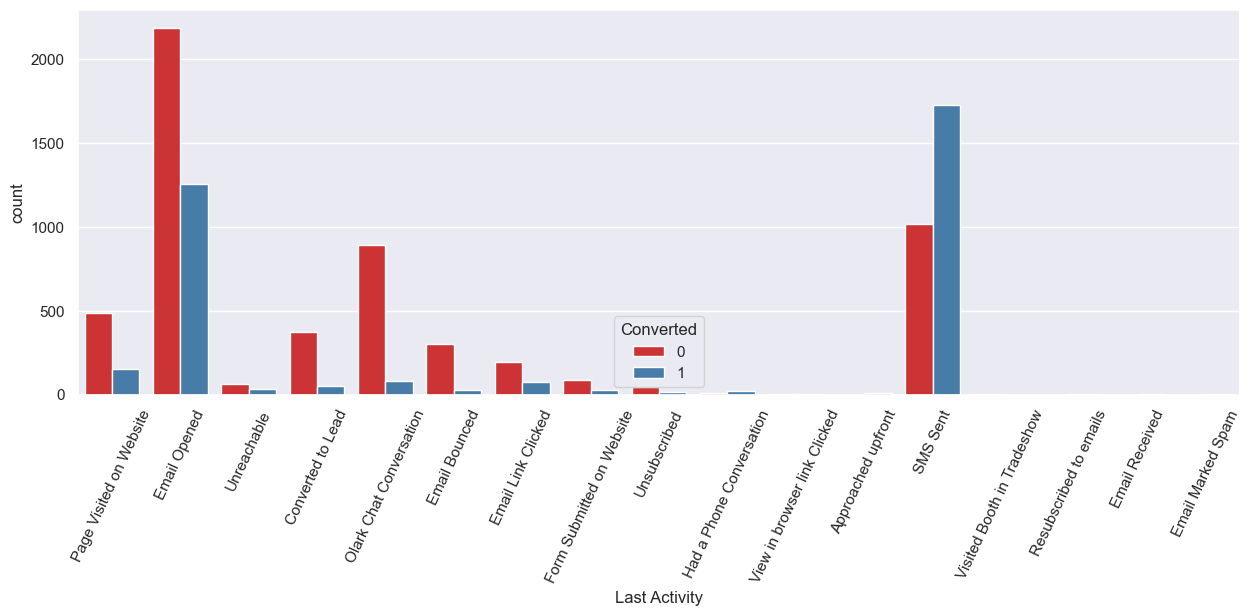

In [17]:
# Comparing Last Activity

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette="Set1")
plt.xticks(rotation = 65)
plt.show()

In [47]:
# Groping Some very low value features to a single group

lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

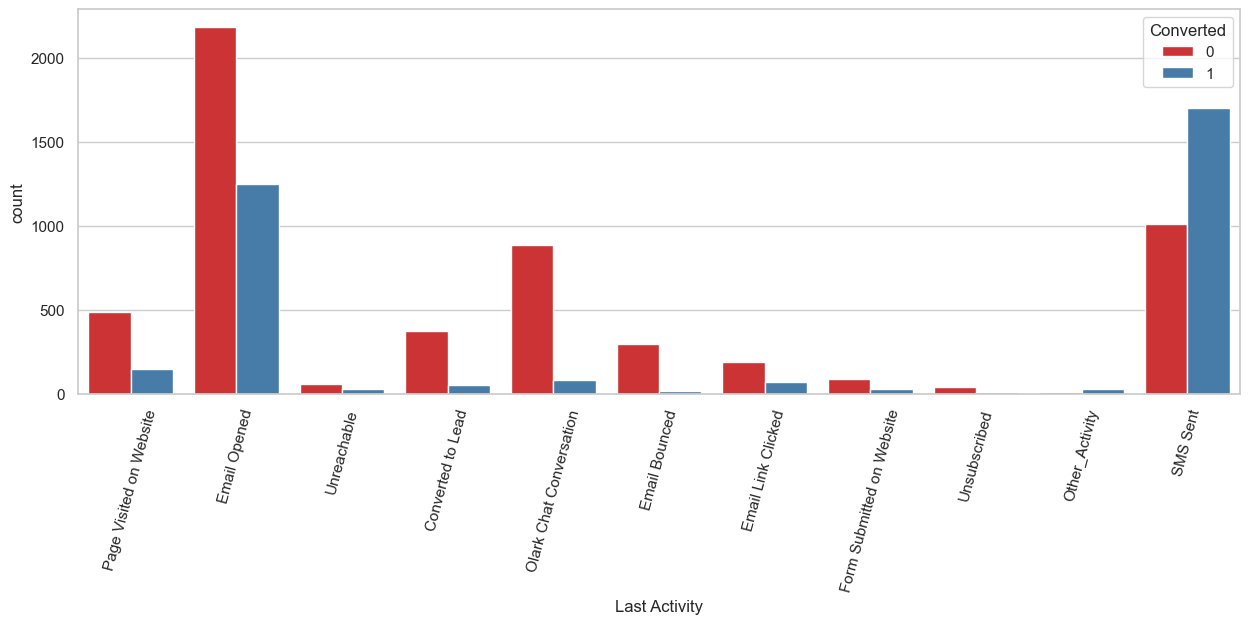

In [48]:
# After Grouping

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data , palette = "Set1")
plt.xticks(rotation = 75)
plt.show()

### Conclusion
The majority of the leads' most recent action was to open an email. Nearly 60% of leads with an SMS sent as their most recent action convert.

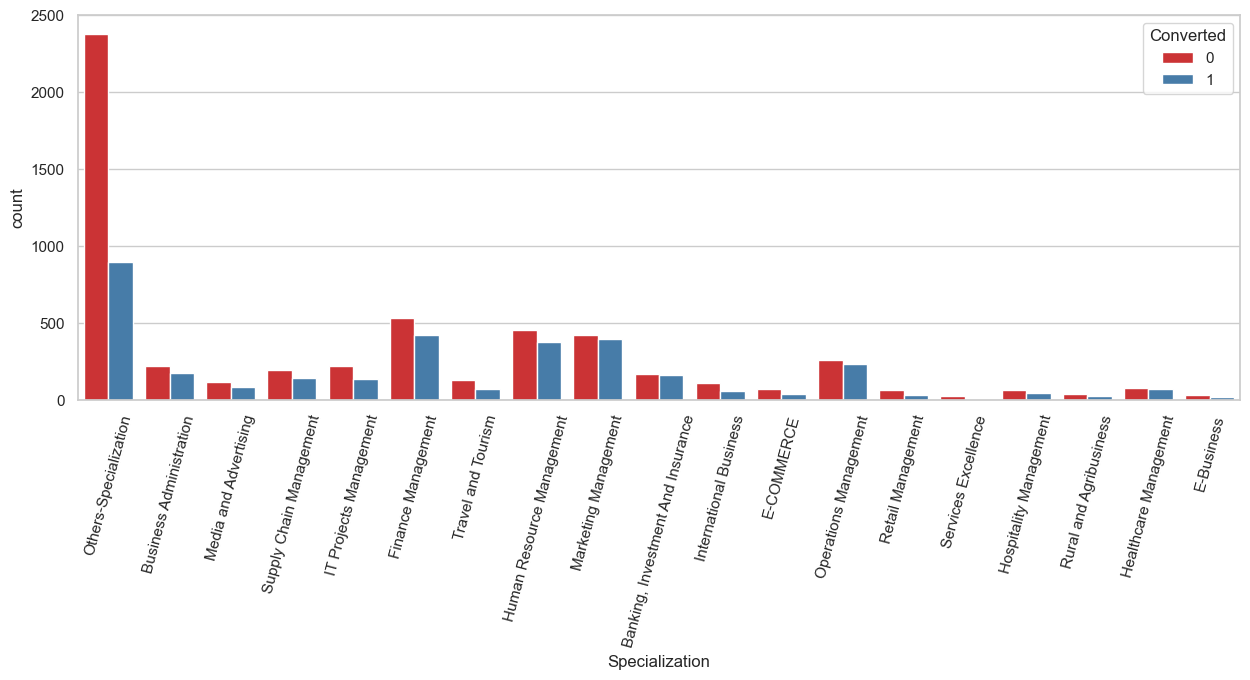

In [49]:
# Compare Specialization

plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data, palette ="Set1")
plt.xticks(rotation = 75)
plt.show()

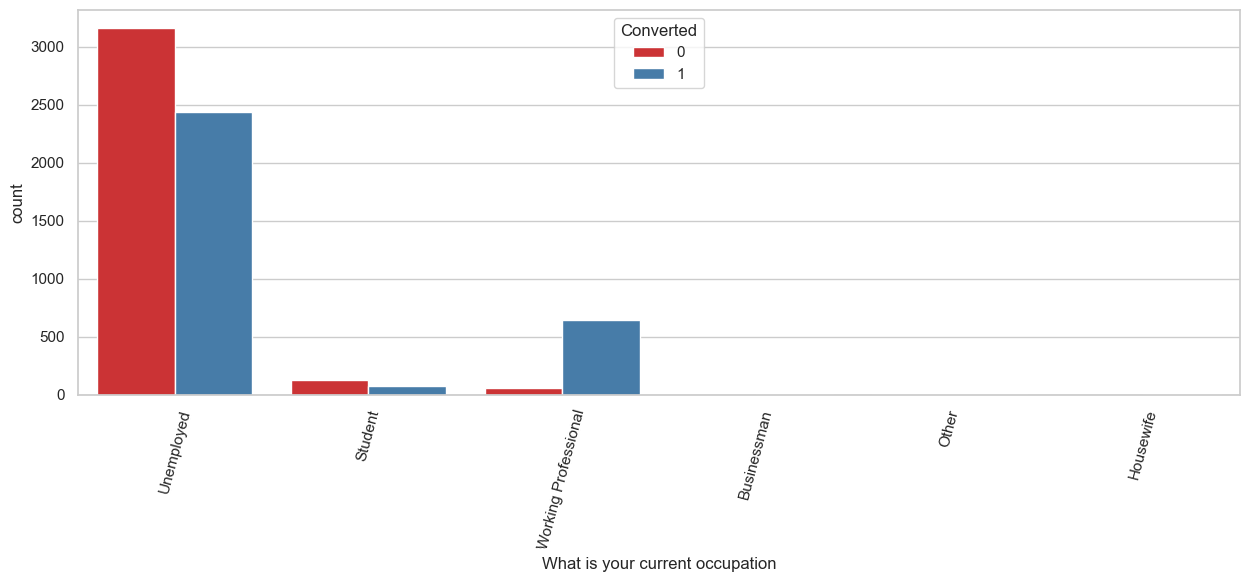

In [22]:
# Compare Current Occupation with Converted

plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data, palette ="Set1")
plt.xticks(rotation = 75)
plt.show()

#### Inference
Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

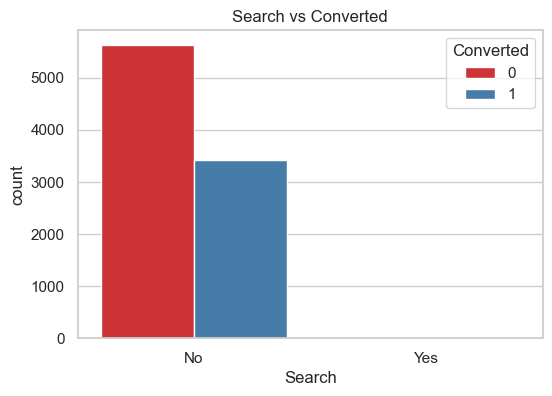

In [64]:
# Plot Search Variable
plt.figure(figsize=(6, 4))  # Adjust the size as needed
sns.countplot(x='Search', hue='Converted', data=lead_data, palette="Set1")
plt.title('Search vs Converted')
plt.xticks(rotation=0)  # Adjust the rotation angle as needed
plt.show()

#### Conclusion
For the graph of Search vs Converted it can be obsereved that majority response is NO which lead to  higher chance of non conversion and lower chances of conversion

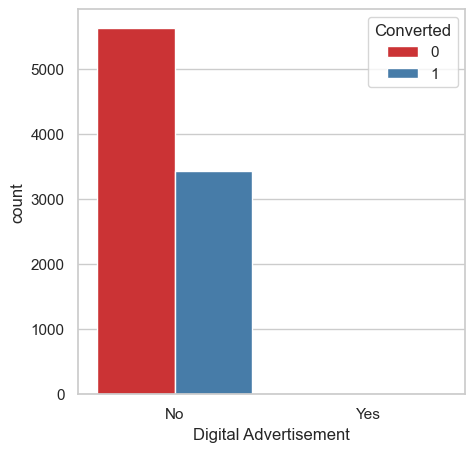

In [67]:
# Plot Digital Advertisement

plt.figure(figsize=(5,5))
sns.countplot(x='Digital Advertisement', hue='Converted',data=lead_data, palette ="Set1")
plt.show()

#### Conclusion
The majority of replies are **No**, however there is a significant conversion rate among those responses. We thus cannot disregard this reality.

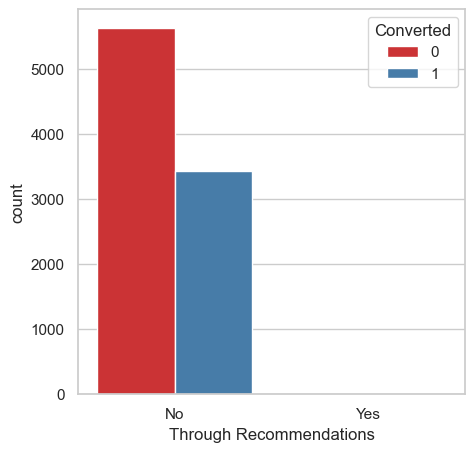

In [68]:
# Plot Through Recommendation Variable

plt.figure(figsize=(5,5))
sns.countplot(x='Through Recommendations', hue='Converted',data=lead_data , palette = "Set1")
plt.show()

## Inference
Although **No** replies make up the majority of the responses, there is a high conversion rate. We cannot thus disregard this truth.

In [69]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [70]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [71]:
# Dropping some variables which are not Significat for the model

lead_data = lead_data.drop(['Lead Number','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [72]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others-Specialization,Unemployed,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others-Specialization,Unemployed,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others-Specialization,Unemployed,No,No,No,Modified


In [73]:
lead_data.shape

(9074, 16)

In [74]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [75]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Search              

In [76]:
# Creating a dummy variable for some of the categorical variables and dropping the first one

dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Search','Digital Advertisement','Through Recommendations','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
# Concatinate dummy dataframe with lead_data

lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [78]:
# Dropping the main categorical variable for which we have create dummy

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Search','Digital Advertisement','Through Recommendations','Last Notable Activity'], axis = 1)

In [79]:
lead_data.shape

(9074, 70)

In [80]:
# Dropping the prospect Id and Converted and adding the rest of variables to "X"

from sklearn.model_selection import train_test_split
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [81]:
# Adding the target variable to "y"

y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [82]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [83]:
# Applying Scaler to numeric variable and fit & transform them

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
# Checking the Convertion Rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

## Model Building
### Running First Training Model
#### First Model Before RFE

In [85]:
import statsmodels.api as sm

# First Logistic regression model before RFE

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2452.0
Date:                Sun, 27 Aug 2023   Deviance:                       4904.1
Time:                        10:55:17   Pearson chi2:                 6.11e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4293
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.5054   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5642      0.228     -6.850      0.000      -2.012      -1.117
Do Not Call                                             22.4791   5.15e+04      0.000      1.000   -1.01e+05    1.01e+05
TotalVisits                                              0.3120      0.058      5.369      0.000       0.198       0.426
Total Time Spent on Website                              1.1178      0.042     26.360      0.000       1.035       1.201
Page Views Per Visit                                    -0.3324      0.065     -5.122      0.000      -0.460      -0.205
Lead Origin_Landing Page Submission                     -0.7947      0.140     -5.659      0.000      -1.070      -0.519
Lead Origin_Lead Add Form                                0.5739      1.009      0.569      0.569      -1.404       2.551
Lead Origin_Lead Import                                 23.6907   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -22.6922   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.3656      0.099      3.693      0.000       0.172       0.560
Lead Source_Olark Chat                                   1.4238      0.166      8.552      0.000       1.098       1.750
Lead Source_Organic Search                               0.1358      0.135      1.007      0.314      -0.128       0.400
Lead Source_Others                                       1.1389      0.656      1.735      0.083      -0.147       2.425
Lead Source_Reference                                    2.7330      1.033      2.646      0.008       0.709       4.757
Lead Source_Referral Sites                               0.0839      0.370      0.227      0.820      -0.641       0.809
Lead Source_Welingak Website                             5.1677      1.243      4.157      0.000       2.731       7.604
Last Activity_Email Bounced                             -0.1295      0.676     -0.192      0.848      -1.454       1.195
Last Activity_Email Link Clicked                         0.6771      0.437      1.550      0.121      -0.179       1.533
Last Activity_Email Opened                               1.0180      0.259      3.935      0.000       0.511       1.525
Last Activity_Form Submitted on Website                  0.4078      0.409      0.998      0.318      -0.393       1.209
Last Activity_Olark Chat Conversation                   -0.2984      0.292     -1.021      0.307      -0.871       0.275
Last Activity_Other_Activity                             2

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Assuming X_train and y_train are your training data and labels

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Specify the estimator and the number of features to select
rfe = rfe.fit(X_train, y_train)


In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 20),
 ('Last Activity_SMS Sent', True, 1

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others-Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_No_Information',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 1

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.1
Date:                Sun, 27 Aug 2023   Deviance:                       5174.1
Time:                        11:04:55   Pearson chi2:                 6.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3421      0.123     -2.791      0.005      -0.582      -0.102
Do Not Email                                            -1.7562      0.189     -9.278      0.000      -2.127      -1.385
Total Time Spent on Website                              1.1162      0.041     27.264      0.000       1.036       1.196
Lead Origin_Landing Page Submission                     -0.9719      0.127     -7.660      0.000      -1.221      -0.723
Lead Origin_Lead Add Form                                3.1453      0.234     13.447      0.000       2.687       3.604
Lead Source_Olark Chat                                   1.1443      0.121      9.419      0.000       0.906       1.382
Lead Source_Welingak Website                             2.5436      0.756      3.364      0.001       1.062       4.026
Last Activity_Other_Activity                             1.9965      0.468      4.263      0.000       1.079       2.914
Last Activity_SMS Sent                                   1.4858      0.075     19.823      0.000       1.339       1.633
Last Activity_Unsubscribed                               1.5816      0.475      3.331      0.001       0.651       2.512
Specialization_Others-Specialization                    -1.0076      0.124     -8.121      0.000      -1.251      -0.764
What is your current occupation_Housewife               22.8006   1.53e+04      0.001      0.999      -3e+04       3e+04
What is your current occupation_No_Information          -1.2394      0.089    -13.976      0.000      -1.413      -1.066
What is your current occupation_Working Professional     2.3771      0.191     12.450      0.000       2.003       2.751
Last Notable Activity_Olark Chat Conversation           -0.7641      0.337     -2.270      0.023      -1.424      -0.104
Last Notable Activity_Unreachable                        2.1654      0.501      4.320      0.000       1.183       3.148
========================================================================================================================
"""

### Model 2

In [95]:
col1 = col.drop('What is your current occupation_Housewife',1)

In [96]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.4
Date:                Sun, 27 Aug 2023   Deviance:                       5182.8
Time:                        11:05:01   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3349      0.122     -2.736      0.006      -0.575      -0.095
Do Not Email                                            -1.7591      0.189     -9.294      0.000      -2.130      -1.388
Total Time Spent on Website                              1.1155      0.041     27.276      0.000       1.035       1.196
Lead Origin_Landing Page Submission                     -0.9719      0.127     -7.669      0.000      -1.220      -0.724
Lead Origin_Lead Add Form                                3.1600      0.234     13.526      0.000       2.702       3.618
Lead Source_Olark Chat                                   1.1428      0.121      9.410      0.000       0.905       1.381
Lead Source_Welingak Website                             2.5281      0.756      3.344      0.001       1.046       4.010
Last Activity_Other_Activity                             1.9917      0.468      4.253      0.000       1.074       2.910
Last Activity_SMS Sent                                   1.4809      0.075     19.768      0.000       1.334       1.628
Last Activity_Unsubscribed                               1.5793      0.475      3.326      0.001       0.649       2.510
Specialization_Others-Specialization                    -1.0122      0.124     -8.164      0.000      -1.255      -0.769
What is your current occupation_No_Information          -1.2417      0.089    -14.007      0.000      -1.415      -1.068
What is your current occupation_Working Professional     2.3717      0.191     12.422      0.000       1.997       2.746
Last Notable Activity_Olark Chat Conversation           -0.7658      0.337     -2.274      0.023      -1.426      -0.106
Last Notable Activity_Unreachable                        2.1607      0.501      4.310      0.000       1.178       3.143
========================================================================================================================
"""

Now all features are looking quite good. The P-Value is also in a acceptable range.

In [97]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.061378
1012    0.090390
9226    0.570838
4750    0.682523
7987    0.918687
1281    0.767930
2880    0.028424
4971    0.963374
7536    0.851967
1248    0.904356
dtype: float64

In [98]:
# Reshaping the values

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06137786, 0.09038965, 0.57083787, 0.68252312, 0.91868727,
       0.76792996, 0.02842379, 0.96337353, 0.8519668 , 0.9043556 ])

#### Creating a dataframe with the actual convertion and the predicted probabilities

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.061378,3009
1,0,0.090390,1012
2,0,0.570838,9226
3,1,0.682523,4750
4,1,0.918687,7987


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.061378,3009,0
1,0,0.090390,1012,0
2,0,0.570838,9226,1
3,1,0.682523,4750,1
4,1,0.918687,7987,1


In [101]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 729 1717]]


In [102]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8143599433160132


### Checking VIF

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others-Specialization,2.11
4,Lead Source_Olark Chat,1.92
2,Lead Origin_Landing Page Submission,1.64
3,Lead Origin_Lead Add Form,1.60
10,What is your current occupation_No_Information,1.60
7,Last Activity_SMS Sent,1.52
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.30
11,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.18


 So Now all VIF value are good. So we need not to drop any variable further and we can proceed for making prediction using this model as our **Final Model**.

In [104]:
x_train = pd.DataFrame(X_train[col1])
x_train.shape

(6351, 14)

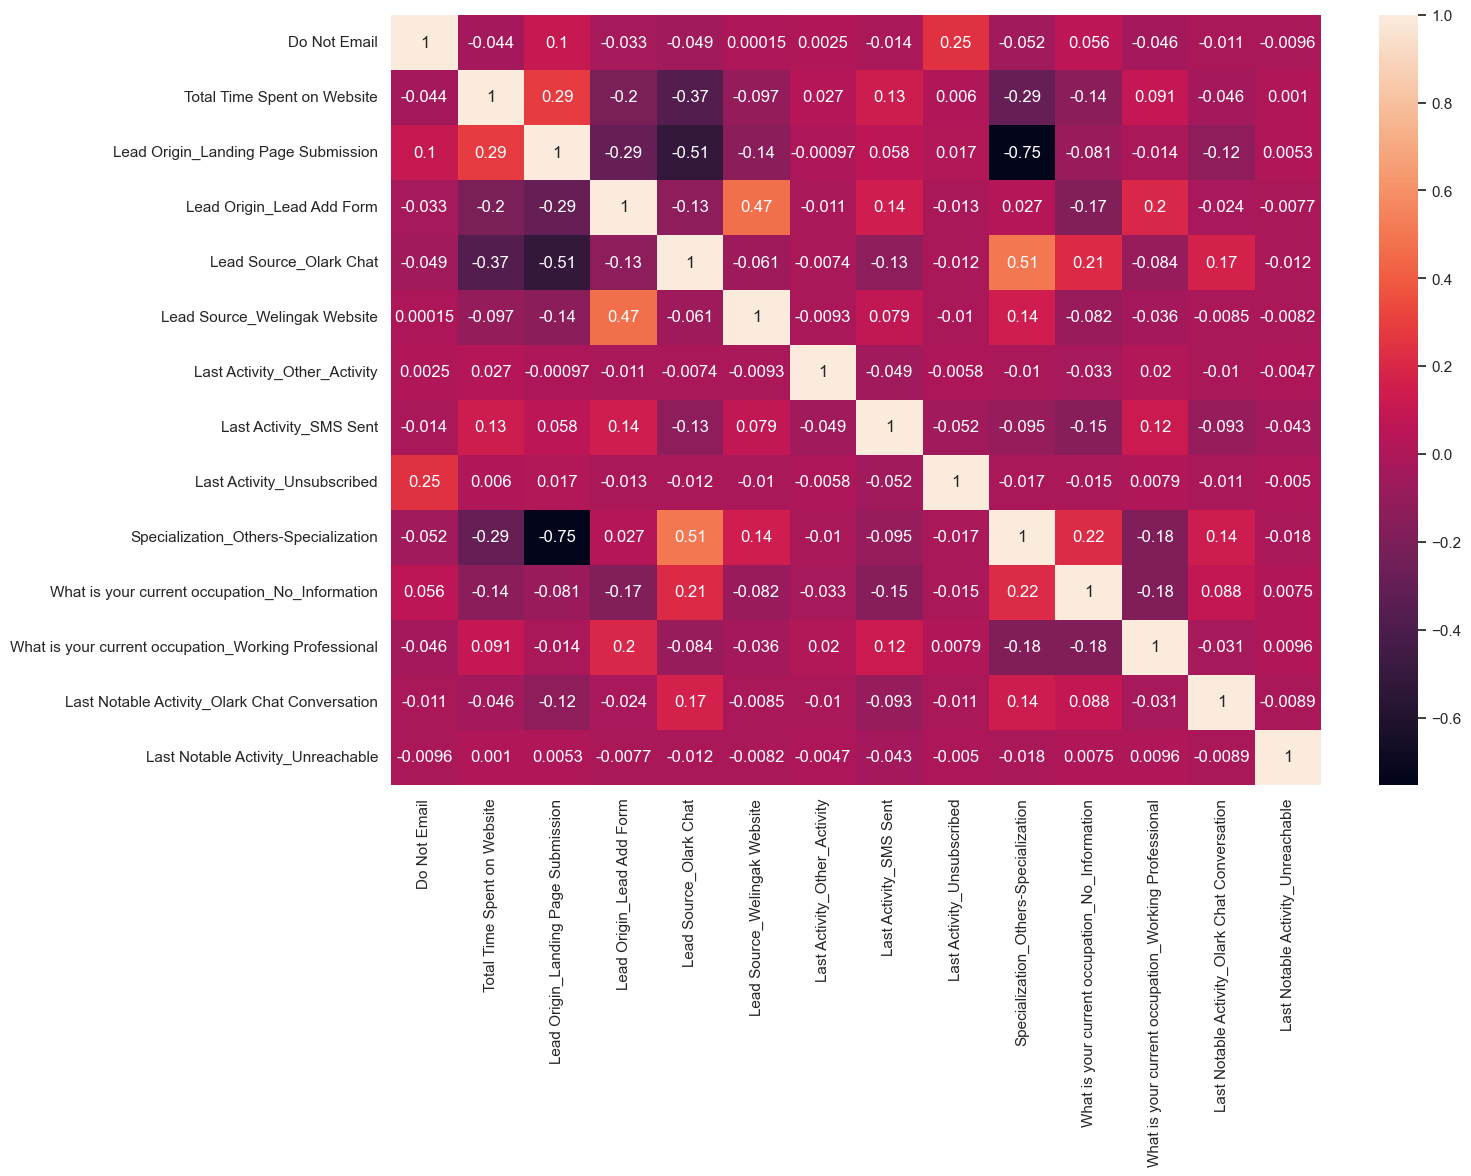

In [105]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(), annot=True)
plt.show()

#### Metrics beyond simply accurac

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7019623875715454

In [108]:
# Let see calculate specificity
TN / float(TN+FP)

0.8847631241997439

In [109]:
# Calculate false postive rate - predicting convertion when customer does not have converted
print(FP/ float(TN+FP))

0.11523687580025609


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.792339640055376


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8257648183556405


##### Step 9: Plotting the ROC Curve

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

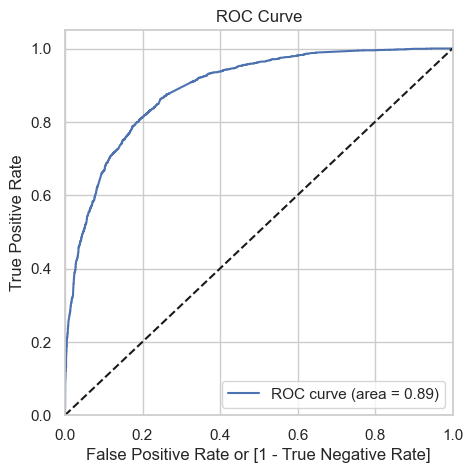

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.627618  0.979150  0.407426
0.2   0.2  0.753267  0.921504  0.647887
0.3   0.3  0.796725  0.840556  0.769270
0.4   0.4  0.809636  0.773508  0.832266
0.5   0.5  0.814360  0.701962  0.884763
0.6   0.6  0.798142  0.600572  0.921895
0.7   0.7  0.782869  0.522486  0.945967
0.8   0.8  0.760983  0.430908  0.967734
0.9   0.9  0.716895  0.286999  0.986172


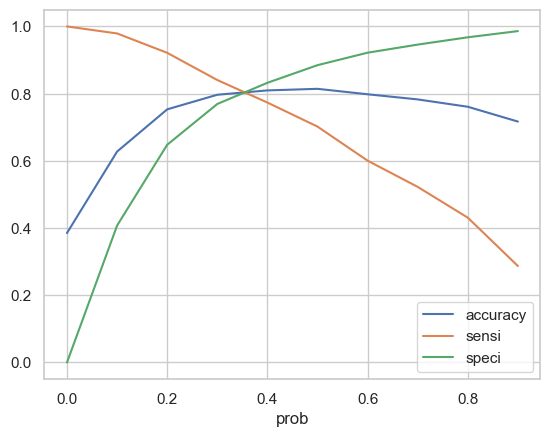

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [118]:
# From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [119]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0,1,57
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0,1,68
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1,1,92


In [120]:
# Assigning Lead Type based on atbitrary cutoff

y_train_pred_final['Lead_type'] = y_train_pred_final.Lead_Score.map(lambda x:'Hot Lead' if x>=80 else 'Cold Lead')

In [121]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,Lead_type
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0,0,6,Cold Lead
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0,0,9,Cold Lead
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0,1,57,Cold Lead
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0,1,68,Cold Lead
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1,1,92,Hot Lead


In [122]:
# Sorting value based on lead Score

y_train_pred_final.sort_values(by='Lead_Score', ascending= False)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,Lead_type
3399,1,0.996619,2764,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
132,1,0.996619,2675,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
2254,1,0.996022,161,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
3389,1,0.995726,1552,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
5434,1,0.996619,2677,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0,0.003716,8252,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead
2279,0,0.002549,8733,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead
4380,0,0.002699,5279,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead
4116,0,0.002020,9173,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead


In [123]:
conversion_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
conversion_df['final_predicted'].value_counts()

1    1933
0     513
Name: final_predicted, dtype: int64

In [124]:
# Checking Conversion Rate on Final Prediction
1933/float(1933+513)

0.7902698282910875

In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8096362777515352

In [126]:
# Lets again check confusion matrix after getting optimal cutoff point

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3209,  696],
       [ 513, 1933]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7902698282910875

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8217669654289372

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17823303457106274


In [131]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7352605553442374


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8621708758731864


#### Precision & Recall

In [133]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.792339640055376

In [134]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7019623875715454

#### Precision & Recall Tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

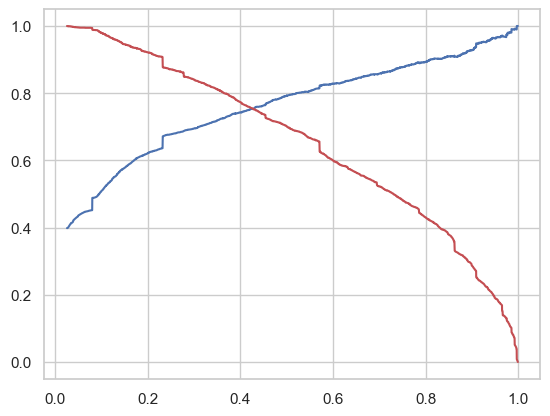

In [137]:
# Optimal plot

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Prediction On Test set

In [138]:
# Transforming Test set on the same variable

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# Evaluating final model based on final model

X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others-Specialization,What is your current occupation_No_Information,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,1,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,1,0,0,0


In [140]:
X_test_sm = sm.add_constant(X_test)

In [141]:
# Lets check prediction

y_test_pred = res.predict(X_test_sm)

In [142]:
y_test_pred[:10]

3271    0.037010
1490    0.959693
7936    0.031410
4216    0.862207
3830    0.039007
1800    0.557021
6507    0.365118
4821    0.288571
4223    0.909079
4714    0.277586
dtype: float64

In [143]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.037010
1490,0.959693
7936,0.031410
4216,0.862207
3830,0.039007


In [144]:
y_test_df = pd.DataFrame(y_test)

In [145]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.037010
1,1,1490,0.959693
2,0,7936,0.031410
3,1,4216,0.862207
4,0,3830,0.039007


In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.037010
1,1,1490,0.959693
2,0,7936,0.031410
3,1,4216,0.862207
4,0,3830,0.039007


In [150]:
# Obtaining final prediction based on optimal cutoff point

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.037010,0
1,1,1490,0.959693,1
2,0,7936,0.031410,0
3,1,4216,0.862207,1
4,0,3830,0.039007,0


In [151]:
# Assigning Lead Score also for Test set

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.037010,0,4
1,1,1490,0.959693,1,96
2,0,7936,0.031410,0,3
3,1,4216,0.862207,1,86
4,0,3830,0.039007,0,4


In [152]:
# Assigning Lead Type also for Test set

y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >=80 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score,Lead_Type
2310,1,3723,0.996619,1,100,Hot Lead
1055,1,2674,0.996619,1,100,Hot Lead
2510,1,2673,0.996619,1,100,Hot Lead
23,1,5822,0.996619,1,100,Hot Lead
25,1,2684,0.996619,1,100,Hot Lead
...,...,...,...,...,...,...
2074,0,7904,0.008522,0,1,Cold Lead
918,0,6677,0.014826,0,1,Cold Lead
548,0,3544,0.010193,0,1,Cold Lead
1753,0,3682,0.002113,0,0,Cold Lead


In [153]:
conversion_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
conversion_df['final_predicted'].value_counts()

1    782
0    207
Name: final_predicted, dtype: int64

In [154]:
# Checking Convertion Percentage on test set
782/float(782+207)

0.7906976744186046

In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8123393316195373

In [156]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1430,  304],
       [ 207,  782]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7906976744186046

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.8246828143021915

In [160]:
# Precision Score

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7200736648250461

In [161]:
# Recall Score

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7906976744186046

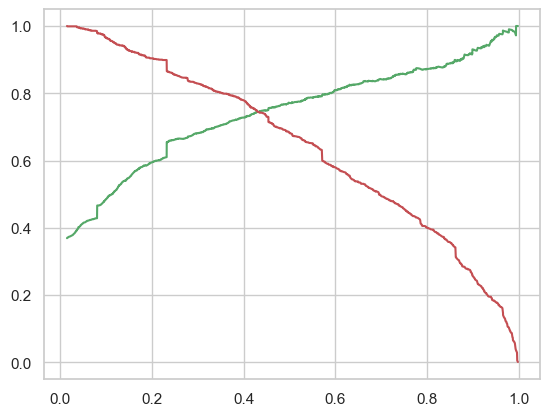

In [162]:
# Plot Thresholds

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Conclusion:

So we can say that our best fitted line for our final model is

### Best_Fitted_Line = 
1.75 * Do Not Email +
1.115 * Total Time Spent On Websites -
0.97 * Lead Origin_Landing Page Submission +
3.16 * Lead Origin_Lead Add Form +
1.14 * Lead Source_Olark Chat +
2.528 * Lead Source_Welingak Website +
1.99 * Lead Activity_Other Activity +
1.48 * SMS Sent +
1.579 * Unsubscribed -
1.01 * Specialization_Other Specialization -
1.24 * What is your current Occupation_No Information +
2.37 * What is your current Occupation_Working Professional -
0.76 * Last Notable Activity_Olark Chat Conversation +
2.16 * Last Notable Activity_Unreachable

- **Based on our final model, we were able to anticipate events with an accuracy of about 81.43% (using an artificial cutoff value of 0.5).Sensitivity, Specificity, and FPR are all 70.19%, respectively. 88.47% on the train set and 11.52%.**

- **The area under the ROC curve is most likely 0.89 for ROC curve.**

- **We then rechecked the sensitivity, specificity, accuracy, precision, and recall matrix based on the ideal cutoff points on the train set, and this time we discovered that the corresponding values were 79%, 82%, 81%, and 17%.**

- **When we examine it using our test set, the aforementioned numbers are pretty comparable for the Test Set.**

- **Additionally, after allocating the lead Score, we examined the conversion rate on the final model, and the result was that it was about 80%. We saw a nearly same conversion rate on the Test Set during examination.**

- **In light of the aforementioned fact, we may conclude that the model's overall performance appears to be fairly strong.**
